# Tech-challenge

## Banco de Dados

In [1]:
# Importando bibliotecas
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando o DataFrame com os dados da base
df_ibovespa = pd.read_csv('Assets/Base/ibovespa.csv', sep=',')

In [3]:
# Verificando o DataFrame
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,15.08.2023,116.552,116.809,117.697,116.238,"11,79M","-0,22%"
1,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
2,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
3,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
4,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
5,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
6,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
7,04.08.2023,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
8,03.08.2023,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
9,02.08.2023,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


In [4]:
# Verificando valores nulos no DataFrame
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [5]:
# Encontrando o dado nulo na linha correspondente
df_ibovespa[df_ibovespa['Vol.'].isna()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1865,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [6]:
# Removendo a linha com valor nulo
# Decidimos remover a linha do DataFrame que apresentava valor nulo para que não haja interferência na construção do nosso modelo de previsão
df_ibovespa = df_ibovespa.drop(df_ibovespa[df_ibovespa['Vol.'].isna()].index)

In [7]:
# Removendo coluna Var%
del df_ibovespa['Var%']

In [8]:
# Verificando o shape do DataFrame
df_ibovespa.shape

(4911, 6)

In [9]:
# Verificando informações do Dataframe
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4911 entries, 0 to 4911
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4911 non-null   object 
 1   Último    4911 non-null   float64
 2   Abertura  4911 non-null   float64
 3   Máxima    4911 non-null   float64
 4   Mínima    4911 non-null   float64
 5   Vol.      4911 non-null   object 
dtypes: float64(4), object(2)
memory usage: 268.6+ KB


In [10]:
# Convertendo coluna Data de object para datetime
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'],format='%d.%m.%Y')
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116.552,116.809,117.697,116.238,"11,79M"
1,2023-08-14,116.810,118.067,118.082,116.530,"11,20M"
2,2023-08-11,118.065,118.350,119.054,117.415,"11,87M"
3,2023-08-10,118.350,118.412,119.438,118.113,"12,69M"
4,2023-08-09,118.409,119.090,119.090,117.901,"11,25M"


In [11]:
# Transformando as colunas que estão como float para int
df_ibovespa['Último'] = df_ibovespa['Último'] * 1000
df_ibovespa['Último'] = df_ibovespa['Último'].astype(int)
df_ibovespa['Abertura'] = df_ibovespa['Abertura'] * 1000
df_ibovespa['Abertura'] = df_ibovespa['Abertura'].astype(int)
df_ibovespa['Máxima'] = df_ibovespa['Máxima'] * 1000
df_ibovespa['Máxima'] = df_ibovespa['Máxima'].astype(int)
df_ibovespa['Mínima'] = df_ibovespa['Mínima'] * 1000
df_ibovespa['Mínima'] = df_ibovespa['Mínima'].astype(int)
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116552,116809,117697,116238,"11,79M"
1,2023-08-14,116810,118067,118082,116530,"11,20M"
2,2023-08-11,118065,118350,119054,117415,"11,87M"
3,2023-08-10,118350,118412,119438,118113,"12,69M"
4,2023-08-09,118409,119090,119090,117901,"11,25M"


In [12]:
# Transformando a coluna Vol. em numérica
df_ibovespa["Vol."] = df_ibovespa["Vol."].replace({",":".","K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116552,116809,117697,116238,11790000
1,2023-08-14,116810,118067,118082,116530,11200000
2,2023-08-11,118065,118350,119054,117415,11870000
3,2023-08-10,118350,118412,119438,118113,12690000
4,2023-08-09,118409,119090,119090,117901,11250000


In [13]:
# Indexando o DataFrame pela data
df_ibovespa_indexData = df_ibovespa.set_index(['Data'])

In [14]:
# Ajustando o DataFrame para os dados ficarem em ordem ascendente quanto a data
df_ibovespa_indexData = df_ibovespa_indexData.sort_index()

In [15]:
# Salvando o DataFrame
#df_ibovespa_indexData.to_csv('Assets/DataFrames/ibov_modelo.csv', index=True)

## Visualização

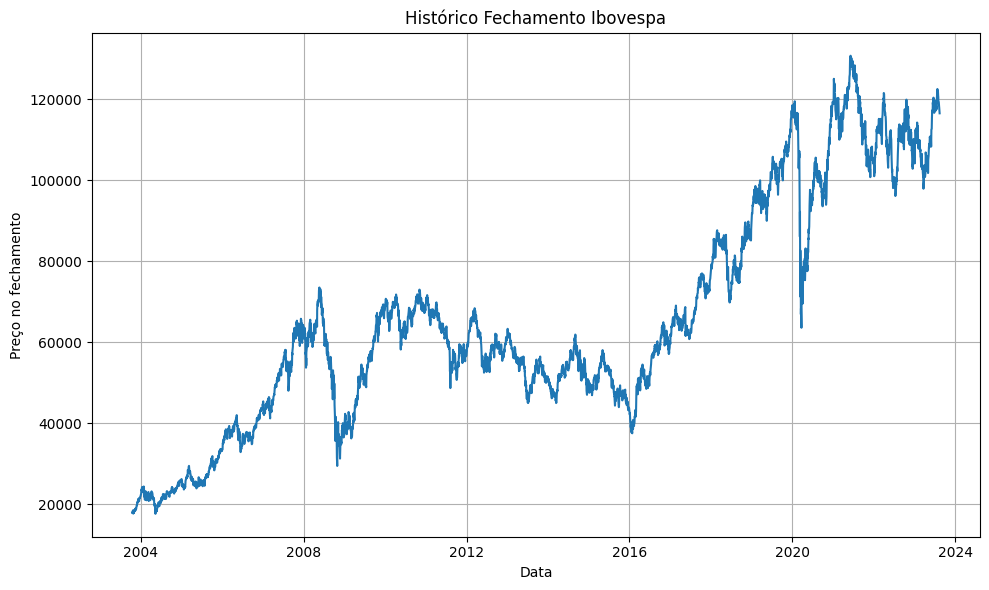

In [16]:
# Criando o gráfico do fechamento histórico do Ibovespa
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Preço no fechamento')
plt.title('Histórico Fechamento Ibovespa')
plt.plot(df_ibovespa_indexData['Último'])
plt.grid()
plt.tight_layout()
#plt.savefig('Assets/Graficos/historico.jpg')
plt.show()

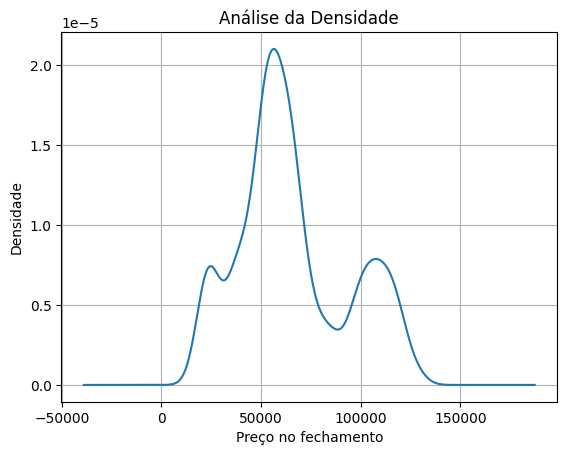

In [17]:
# Distribuição do dataset
df_fechamento = df_ibovespa_indexData['Último']
df_fechamento.plot(kind='kde')
plt.title('Análise da Densidade')
plt.xlabel('Preço no fechamento')
plt.ylabel('Densidade')
plt.grid()
#plt.savefig('Assets/Graficos/densidade.jpg')
plt.show()

In [18]:
# Transformação logarítmica da série temporal
df_ibovespa_indexData_log = np.log(df_ibovespa_indexData['Último'])

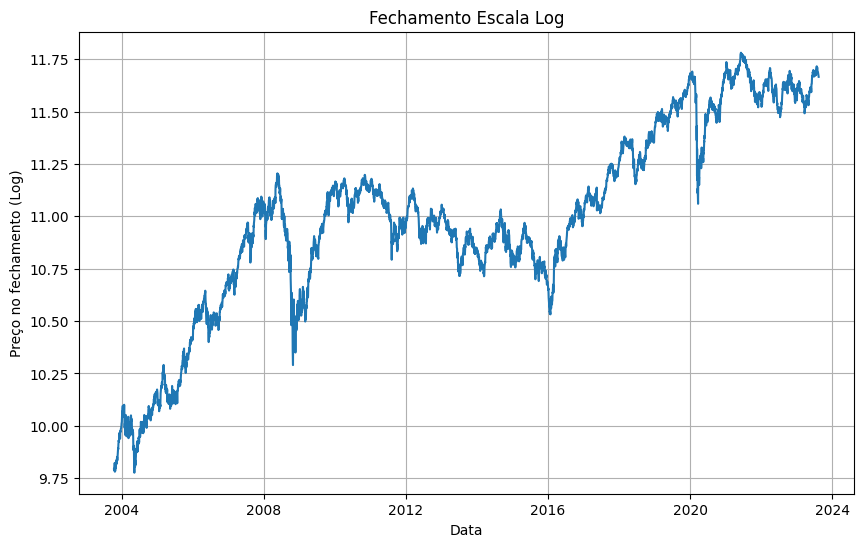

In [19]:
# Gráfico da série temporal logaritmica
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Preço no fechamento (Log)')
plt.title('Fechamento Escala Log')
plt.plot(df_ibovespa_indexData_log)
plt.grid()
#plt.savefig('Assets/Graficos/log.jpg')
plt.show()

In [20]:
# Calculando a média móvel
rolmean = df_ibovespa_indexData['Último'].rolling(12).mean()
rolmean_log = df_ibovespa_indexData_log.rolling(12).mean()

In [21]:
# Calculando o desvio padrão
rolstd = df_ibovespa_indexData['Último'].rolling(12).std()
rolstd_log = df_ibovespa_indexData_log.rolling(12).std()

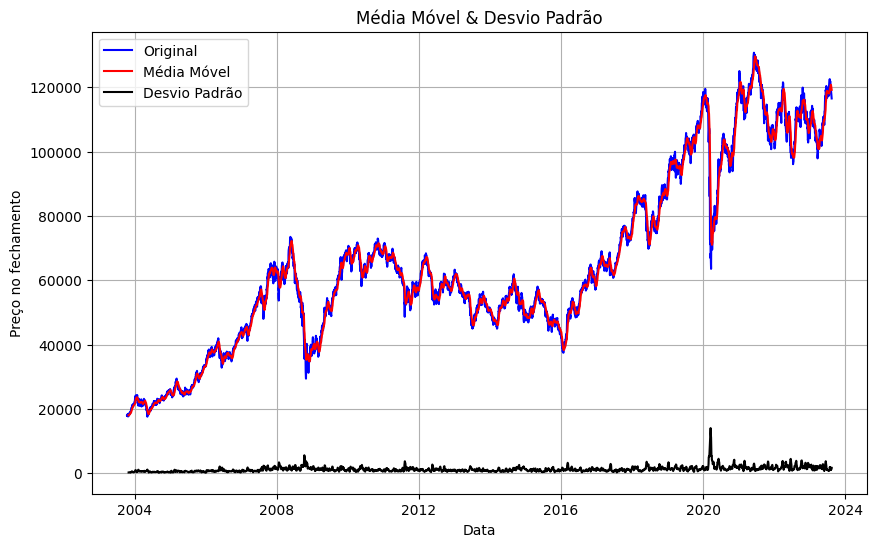

In [22]:
# Média Móvel & Desvio Padrão

plt.figure(figsize=(10,6))
plt.plot(df_ibovespa_indexData['Último'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Média Móvel')
plt.plot(rolstd, color='black', label='Desvio Padrão')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Preço no fechamento')
plt.title('Média Móvel & Desvio Padrão')
plt.grid()
#plt.savefig('Assets/Graficos/mm_std.jpg')
plt.show()

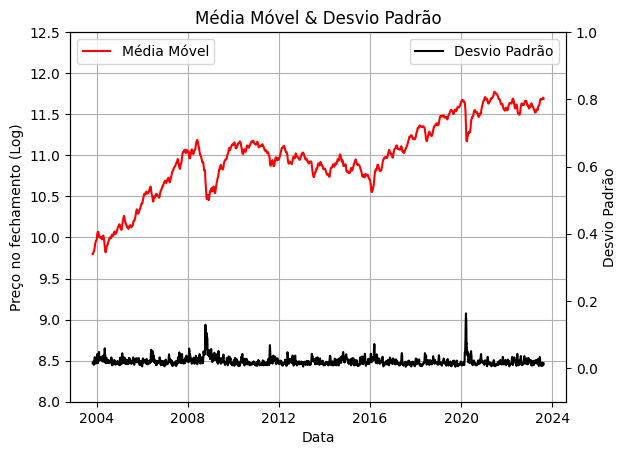

<Figure size 1000x600 with 0 Axes>

In [23]:
# Média Móvel & Desvio Padrão

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,6))
ax1.plot(rolmean_log, color='red', label='Média Móvel')
ax2 = ax1.twinx()
ax2.plot(rolstd_log, color='black', label='Desvio Padrão')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço no fechamento (Log)')
ax1.set_title('Média Móvel & Desvio Padrão')
ax1.set_ylim(8,12.5)
ax2.set_ylabel('Desvio Padrão')
ax2.set_ylim(-0.1, 1)
ax1.grid()
#fig.savefig('Assets/Graficos/mm_std_log.jpg')
plt.show()

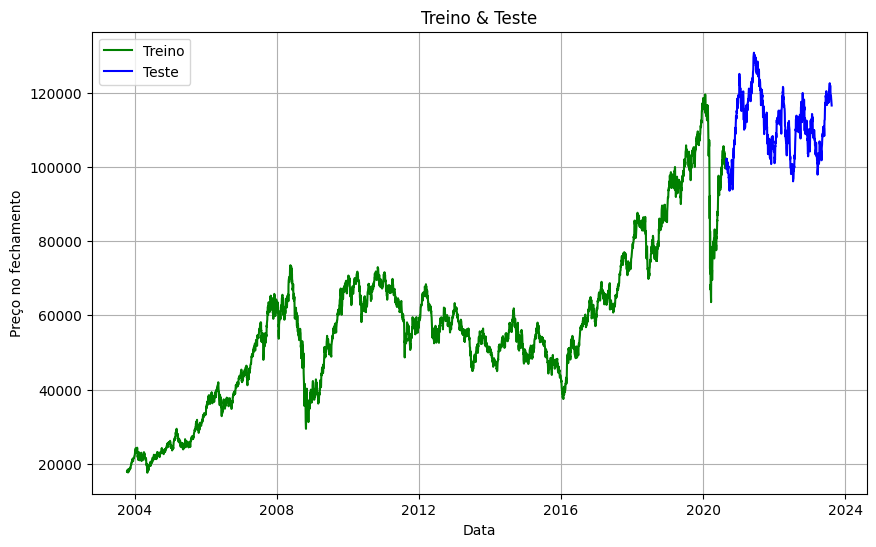

In [24]:
# Por se tratar de dados sensíveis e de maior volatilidade, decidimos dividir treinamento e teste em aproximadamente 90% e 10% dos dados, respectivamente.
# Selecionando um período de aproximadamente 7 meses de dados para o teste.

treino = df_ibovespa_indexData.iloc[:int(.85*len(df_ibovespa_indexData)), :]
teste = df_ibovespa_indexData.iloc[int(.85*len(df_ibovespa_indexData)):, :]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Preço no fechamento')
plt.title('Treino & Teste')
plt.plot(treino["Último"], 'green', label='Treino')
plt.plot(teste["Último"], 'blue', label='Teste')
plt.legend()
#plt.savefig('Assets/Graficos/treino_teste.jpg')
plt.show()

## Modelo

In [25]:
# Definindo as variáveis de características e target do modelo
caracteristicas = ["Abertura","Máxima","Mínima","Vol."]
target = 'Último'

In [26]:
# Criando e treinando o modelo
modelo = xgb.XGBRegressor()
modelo.fit(treino[caracteristicas], treino[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Previsão

In [27]:
# Criando e mostrando a previsão nos dados de teste
previsoes = modelo.predict(teste[caracteristicas])
print('Previsões do modelo:')
print(previsoes)

Previsões do modelo:
[101723.625  99988.08  101242.07  102306.07  100162.05   99860.3
 100003.68  101212.35   99553.875  99227.74   99597.98  100655.06
 100655.06   99391.75   99090.125  96282.25   97211.03   96396.99
  97164.875  96320.805  95931.52   94704.586  95143.375  94796.336
  94435.83   95248.26   96616.125  95628.12   96905.66   98047.18
  98579.79   99160.62   99147.95   99173.93   99241.91   99760.98
 100809.01  101833.55  101419.4   101454.92  101185.57   95993.21
  94211.61   93897.37   95401.7    97421.086 100054.984 100759.914
 102089.37  104115.61  105074.734 102198.45  104267.44  105048.1
 106887.33  106963.914 106414.35  106297.53  107070.07  108213.17
 111577.58  111736.6   111792.47  110379.016 111262.78  111814.625
 111518.39  113224.95  114118.43  114273.195 112681.02  113579.89
 115199.22  116040.56  116099.04  116099.82  119113.28  119247.695
 115439.47  117023.43  117231.625 119247.695 118407.3   118407.3
 118322.836 118110.74  118426.15  118426.15  118469.28

In [28]:
# Mostrando os valores originais
print('Valores originais:')
print(teste[target])

Valores originais:
Data
2020-08-28    102143
2020-08-31     99369
2020-09-01    102168
2020-09-02    101911
2020-09-03    100721
               ...  
2023-08-09    118409
2023-08-10    118350
2023-08-11    118065
2023-08-14    116810
2023-08-15    116552
Name: Último, Length: 737, dtype: int32


In [29]:
# Mostrando a acurácia do modelo
acuracia = modelo.score(teste[caracteristicas], teste[target])
print('Acurácia:')
print(acuracia)

Acurácia:
0.8809057960319034


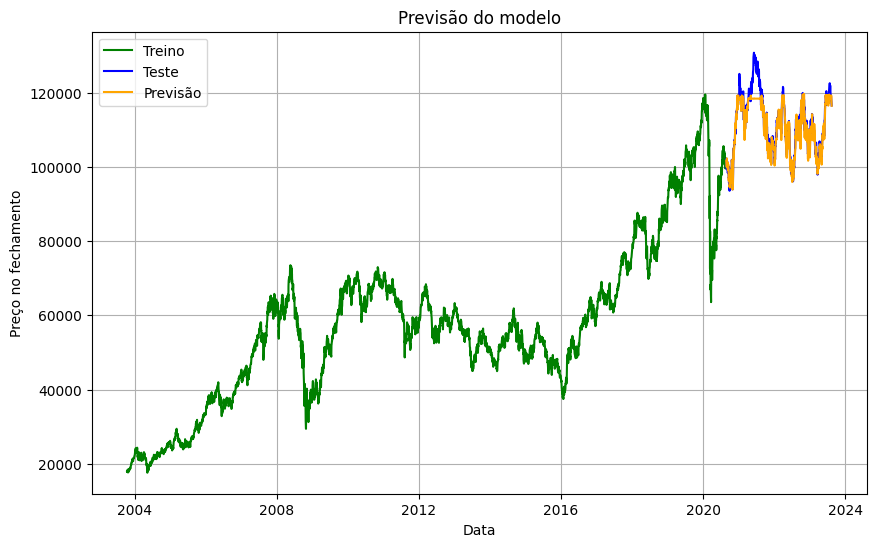

In [30]:
# Plotando as previsões e o preço no fechamento
plt.figure(figsize=(10,6))
plt.plot(treino['Último'], color='green', label='Treino')
plt.plot(teste['Último'], color = 'blue', label='Teste')
plt.plot(teste[target].index, previsoes, color = 'orange',label='Previsão')
plt.title('Previsão do modelo')
plt.xlabel('Data')
plt.ylabel('Preço no fechamento')
plt.legend()
plt.grid()
#plt.savefig('Assets/Graficos/previsao_target.jpg')
plt.show()